In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
img = cv2.imread('./test/beast.jpg')
img.shape

(1320, 1980, 3)

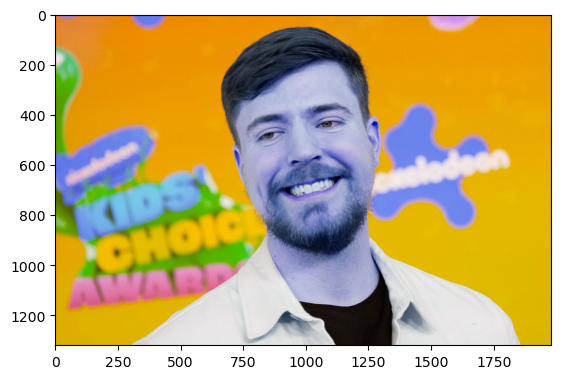

In [14]:
plt.imshow(img)

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1320, 1980)

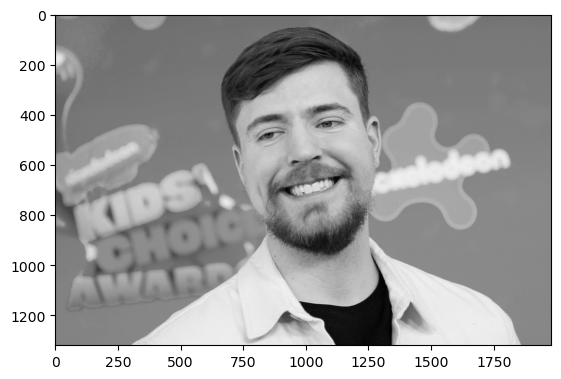

In [16]:
plt.imshow(gray, cmap='gray')

In [17]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img,1.3, 5)
faces

array([[658, 190, 649, 649]])

In [18]:
(x,y,w,h) = faces[0]

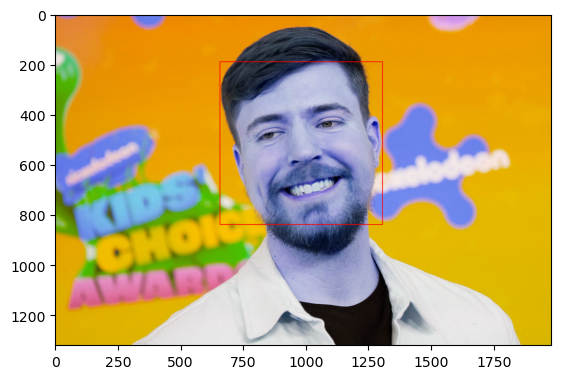

In [19]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

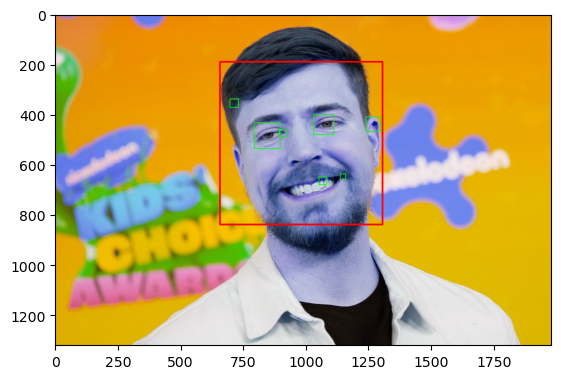

In [20]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [58]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

def get_cropped_image_if_2_eyes(image_path):
    print(image_path)
    img = cv2.imread(image_path)
   
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color



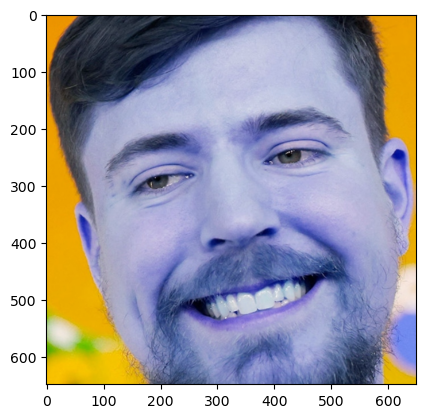

In [12]:

cropped_image = get_cropped_image_if_2_eyes('./test/beast.jpg')

if cropped_image is not None:
    plt.imshow(cropped_image)

In [43]:
path_to_data = './images'
path_to_cr_data = './images/cropped/'

In [44]:
import os
img_dirs = []
for file in os.scandir(path_to_data):
    if files.is_dir():
        img_dirs.append(file.path)
img_dirs

['./images\\andrew',
 './images\\elon musk',
 './images\\lionel messi',
 './images\\mr beast',
 './images\\tristain tate']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)  # if exist remove 
os.mkdir(path_to_cr_data)

In [60]:
cropped_image_dirs = []
celebrity_file_names_dict = {}


for img_dir in img_dirs:
    count = 1
    celebrity_names = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_names] = []
    
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_names
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Genrating ",cropped_folder)
            cropped_file_name = celebrity_names + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_names].append(cropped_file_path)
            count +=1
            

./images\andrew\-Lt_IrhL_400x400.jpg
./images\andrew\0x0.jpg
./images\andrew\1003497_2200306_SK-AK-GEO_updates.jpg
./images\andrew\1054021767_screenshot-2023-04-26-at-5-01-12-am_1600_900.jpg
./images\andrew\1300.jpg
./images\andrew\1339065.jpg
./images\andrew\16799551917085.jpg
./images\andrew\16904077345286.jpg
./images\andrew\2.26537799.jpg
./images\andrew\20230724_080734_68966d8a7db473d0fb0f71a51e6450ad.jpg
./images\andrew\220816-one-time-use-andrew-tate-se-1222p-0daa32.jpg
./images\andrew\24xp-tate-mediumSquareAt3X.jpg
./images\andrew\2708.jpg
./images\andrew\289202-andrew-tate.jpg
./images\andrew\30265-16919010263145-1920.jpg
./images\andrew\375e5-16741005080676-1920.jpg
./images\andrew\3aae0-16608341111313-1920.jpg
./images\andrew\4078c-16873808881969-1920.jpg
./images\andrew\46bd87f3508d4d75861a5e5833393425_xl.png
./images\andrew\4c52de02-ce9f-41d7-9748-3f38b7572f59.jpg
./images\andrew\5855_2C$ratio_1_2C$width_1059_2C$x_678_2C$y_162_t_crop_custom_q_86_2Cf_auto_.jpg
./images\andr

./images\elon musk\elon-musk-gty-gmh-221220_1671587715270_hpMain_4x5_992.jpg
./images\elon musk\elon-musk-kids.jpg
./images\elon musk\elon-musk-rolling-stone-interview-ae137f40-5cf4-4b28-bc47-d37b06b60310.jpg
./images\elon musk\elon-musk-rt-jt-230511_1683834880758_hpMain_4x5_992.jpg
./images\elon musk\elon-musk-Split-9e9c6c0d8dca4cfdbe3d14463fd1885f.jpg
./images\elon musk\elon-musk-time-nyc-2022-billboard-1548.jpg
./images\elon musk\Elon-Musk-Twitter-CEO.png
./images\elon musk\elon-musk-unblocks-everyone-on-twitter-calls-negative-feedback-a-good-thing.jpg
./images\elon musk\Elon-Musk-Vivatech-Business-1499013102.jpg
./images\elon musk\Elon-Musk-Wants-Comedy-on-Twitter,-Can_E2_80_99t-Take-a-Joke-Alamy-2JACR0P.jpg
./images\elon musk\elon-musk-weight-loss.jpg
./images\elon musk\Elon-Musk.jpg
./images\elon musk\Elon-scaled.jpg
./images\elon musk\elonmusk_1666964016540_1691232955851.jpg
./images\elon musk\ElonMusk_2017-stageshot.jpg
./images\elon musk\elon_20musk-471769866.jpg
./images\elon

./images\lionel messi\skynews-lionel-messi-argentina_5991764.jpg
./images\lionel messi\skysports-lionel-messi-argentina_6000508.jpg
./images\lionel messi\skysports-lionel-messi-kevin-de-bruyne_6040618.jpg
./images\lionel messi\skysports-messi-psg-ligue-1_6021068.jpg
./images\lionel messi\SOCCER-messi-MIA--51_1691718195971_1691718197507.jpg
./images\lionel messi\SOCCER-USA--43_1691806107533_1691806203949.jpg
./images\lionel messi\thequint_2F2023-08_2F7bf9085b-9dbb-4e11-8e27-9b2daefafacb_2F12081_ap08_12_2023_000002b.jpg
./images\lionel messi\Where-Lionel-Messi-May-Be-Living-in-South-Florida-main-1400x875.jpg
./images\lionel messi\XTHJCM3WLBBLDHNYGEDKMRXPR4.jpg
./images\lionel messi\zefgx4vmpsvfchbc431n.jpg
./images\lionel messi\_2Fmethode_2Ftimes_2Fprod_2Fweb_2Fbin_2F63760a06-6e63-11ed-8a5b-f385de7508fe.jpg
./images\lionel messi\_url=https_3A_2F_2Fassets.apnews.jpg
./images\lionel messi\_url=https_3A_2F_2Fcalifornia-times-brightspot.s3.amazonaws.com_2F87_2Fdf_2Ff1b51734478e98b023b4871dee

./images\tristain tate\com_media_.jpg
./images\tristain tate\dff0f306-untitled-design-2023-07-02t032739.723.jpg
./images\tristain tate\ede0a5ba-dad0-4d61-9585-3b446ddbefc5.png
./images\tristain tate\fdac5c7a-untitled-design-2023-03-28t172520.587.jpg
./images\tristain tate\ffaca-16914291481387-1920.jpg
./images\tristain tate\Fs-IVbwXoBcwvG9.jpg
./images\tristain tate\FsybC9nWYAIy1Yb.jpg
./images\tristain tate\imago0201462041h.jpg
./images\tristain tate\IMG_COM_20230415_2319_11_5441.jpg
./images\tristain tate\IMG_COM_20230625_1642_15_5441.jpg
./images\tristain tate\jgqlt_512.jpg
./images\tristain tate\maxresdefault (1).jpg
./images\tristain tate\maxresdefault (2).jpg
./images\tristain tate\maxresdefault.jpg
./images\tristain tate\medium_2023-01-05-bedb863c9c.jpg
./images\tristain tate\Money_Made_Rich_Dudes_Tristan_Tate_MO_480x480_for_big_image_b33d9efbde.png
./images\tristain tate\net_ugc_2070008093761155481_E5129425B86823E754096028F7C7A458CD45AEBF_.jpg
./images\tristain tate\NINTCHDBPIC